# Usage plots for 2.2i/runs/test-med-1/w_2022_50/DM-37223

This notebook contains some quick aggregation and plotting of the usage statistics generated with `build-gather-resource-usage-qg `.

The `u/yusra/w_2022_50_usage` collection was generated by running the following:

```
$ANALYSIS_DRP_DIR/bin/build-gather-resource-usage-qg /sdf/group/rubin/repo/dc2 $HOME/w_2022_50_usage 2.2i/runs/test-med-1/w_2022_50/DM-37223

pipetask run -b /sdf/group/rubin/repo/dc2 -g $HOME/w_2022_50_usage -o u/yusra/w_2022_50_usage --register-dataset-types &> log
```

In [1]:
from lsst.daf.butler import Butler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
butler = Butler('/sdf/group/rubin/repo/dc2', collections=['u/yusra/w_2022_50_usage'])

In [2]:
res = butler.registry.queryDatasetTypes()
resList = list(set(res))
[r.name for r in resList if r.name.endswith('usage')]

['consolidateObjectTable_resource_usage',
 'PA1_resource_usage',
 'AF3_design_resource_usage',
 'AM2_resource_usage',
 'histPlot_skyObject_resource_usage',
 'deblend_resource_usage',
 'skyObjectMean_resource_usage',
 'matchCatalogsTractGxsSNR5to80_resource_usage',
 'selectGoodSeeingVisits_resource_usage',
 'drpAssociation_resource_usage',
 'consolidateForcedSourceTable_resource_usage',
 'plot_astromRefCat_scatter_tract_dDec_resource_usage',
 'plot_E2Diff_scatter_resource_usage',
 'plot_yFit_PSF_resource_usage',
 'psfPhotRepStar1_resource_usage',
 'plot_CModel_sub_PSFmag_meas_sky_galaxies_resource_usage',
 'transformForcedSourceTable_resource_usage',
 'plot_ri_gr_psf_resource_usage',
 'AD1_design_resource_usage',
 'consolidateSourceTable_resource_usage',
 'forcedPhotCcd_resource_usage',
 'matchCatalogsPatchMultiBand_resource_usage',
 'characterizeImage_resource_usage',
 'plot_shapeSizeFractionalDiff_scatter_resource_usage',
 'AM1_resource_usage',
 'plot_astromRefCat_scatter_tract_dRA_re

In [3]:
quantileList = []
for rname in [r.name for r in resList if r.name.endswith('usage')]:
    parq = butler.get(rname)
    df = parq.quantile([0,0.01,0.05,.32,.50,.68,.95,.99, 1], numeric_only=True).reset_index()
    df['task'] = rname.replace('_resource_usage', '')
    df['quanta'] = len(parq)
    df['integrated_runtime'] = parq["run_time"].sum()
    quantileList.append(df[["index", "quanta", "task", "memory", "init_time", "run_time", 'integrated_runtime']])

In [4]:
qq = pd.concat(quantileList)

In [5]:
qq["memoryGB"] = qq['memory']/1073741824
qq['integrated_runtime_hrs'] = qq['integrated_runtime']/3600.

In [6]:
memoryGB = pd.pivot_table(qq, values='memoryGB', columns=['index'], index=['task'])

In [7]:
runtime = pd.pivot_table(qq, values='run_time', columns=['index'], index=['task'])

In [8]:
memoryGB = memoryGB.add_prefix('memGB_')
runtime = runtime.add_prefix('runtime_')

In [9]:
label = [("compareObjectToTruth", "analysis"),
("histPlot_skyObject", "analysis"),
("matchObjectToTruth", "analysis"),
("match_astromRefCat_objectTable", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_galaxies", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_all_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_sky_all", "analysis"),
("plot_CircAp12_sub_PSF_meas_gals_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_gals", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_stars_scatter", "analysis"),
("plot_E1Diff_magDiff_scatter", "analysis"),
("plot_E1Diff_scatter", "analysis"),
("plot_E1Diff_sky", "analysis"),
("plot_E2Diff_magDiff_scatter", "analysis"),
("plot_E2Diff_scatter", "analysis"),
("plot_E2Diff_sky", "analysis"),
("plot_PSFFluxSN_meas_sky_all", "analysis"),
("plot_RhoStatistics", "analysis"),
("plot_astromRefCat_scatter_tract_dDec", "analysis"),
("plot_astromRefCat_scatter_tract_dRA", "analysis"),
("plot_astromRefCat_sky_tract_dDec", "analysis"),
("plot_astromRefCat_sky_tract_dRA", "analysis"),
("plot_ri_gr_cmodel", "analysis"),
("plot_ri_gr_psf", "analysis"),
("plot_shapeSizeFractionalDiff_magDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_sky", "analysis"),
("plot_wFit_CModel", "analysis"),
("plot_wFit_PSF", "analysis"),
("plot_xFit_CModel", "analysis"),
("plot_xFit_PSF", "analysis"),
("plot_yFit_CModel", "analysis"),
("plot_yFit_PSF", "analysis"),
("skyPlot_skyObject", "analysis"),
("assembleCoadd", "drp"),
("calibrate", "drp"),
("characterizeImage", "drp"),
("consolidateAssocDiaSourceTable", "drp"),
("consolidateDiaSourceTable", "drp"),
("consolidateForcedSourceOnDiaObjectTable", "drp"),
("consolidateForcedSourceTable", "drp"),
("consolidateFullDiaObjectTable", "drp"),
("consolidateHealSparsePropertyMaps", "drp"),
("consolidateObjectTable", "drp"),
("consolidateSourceTable", "drp"),
("consolidateVisitSummary", "drp"),
("deblend", "drp"),
("detectAndMeasureDiaSources", "drp"),
("detection", "drp"),
("drpAssociation", "drp"),
("drpDiaCalculation", "drp"),
("finalizeCharacterization", "drp"),
("forcedPhotCcd", "drp"),
("forcedPhotCcdOnDiaObjects", "drp"),
("forcedPhotCoadd", "drp"),
("forcedPhotDiffOnDiaObjects", "drp"),
("forcedPhotDiffim", "drp"),
("getTemplate", "drp"),
("healSparsePropertyMaps", "drp"),
("isolatedStarAssociation", "drp"),
("isr", "drp"),
("makeCcdVisitTable", "drp"),
("makeVisitTable", "drp"),
("makeWarp", "drp"),
("measure", "drp"),
("mergeDetections", "drp"),
("mergeMeasurements", "drp"),
("selectGoodSeeingVisits", "drp"),
("subtractImages", "drp"),
("templateGen", "drp"),
("transformDiaSourceCat", "drp"),
("transformForcedSourceOnDiaObjectTable", "drp"),
("transformForcedSourceTable", "drp"),
("transformObjectTable", "drp"),
("transformSourceTable", "drp"),
("writeForcedSourceOnDiaObjectTable", "drp"),
("writeForcedSourceTable", "drp"),
("writeObjectTable", "drp"),
("writeSourceTable", "drp"),
("AB1", "faro"),
("AD1_design", "faro"),
("AD2_design", "faro"),
("AD3_design", "faro"),
("AF1_design", "faro"),
("AF2_design", "faro"),
("AF3_design", "faro"),
("AM1", "faro"),
("AM2", "faro"),
("AM3", "faro"),
("PA1", "faro"),
("PF1_design", "faro"),
("TE1", "faro"),
("TE2", "faro"),
("TE3", "faro"),
("TE4", "faro"),
("matchCatalogsPatch", "faro"),
("matchCatalogsPatchMultiBand", "faro"),
("matchCatalogsTract", "faro"),
("matchCatalogsTractGxsSNR5to80", "faro"),
("matchCatalogsTractMag17to21p5", "faro"),
("matchCatalogsTractStarsSNR5to80", "faro"),
("modelPhotRepGal1", "faro"),
("modelPhotRepGal2", "faro"),
("modelPhotRepGal3", "faro"),
("modelPhotRepGal4", "faro"),
("modelPhotRepStar1", "faro"),
("modelPhotRepStar2", "faro"),
("modelPhotRepStar3", "faro"),
("modelPhotRepStar4", "faro"),
("nsrcMeasVisit", "faro"),
("psfPhotRepStar1", "faro"),
("psfPhotRepStar2", "faro"),
("psfPhotRepStar3", "faro"),
("psfPhotRepStar4", "faro"),
("skyObjectMean", "faro"),
("skyObjectStd", "faro"),
("wPerp", "faro"),
]

labelDF = pd.DataFrame(label)
labelDF.columns = ['task', 'label']


In [10]:
memrun = pd.merge(memoryGB.reset_index(), runtime.reset_index())
memrun = pd.merge(qq[['task','quanta', 'integrated_runtime_hrs']].drop_duplicates().sort_values('task'), memrun)
memrun = pd.merge(labelDF, memrun)

In [11]:
memrun

,task,label,quanta,integrated_runtime_hrs,memGB_0.0,memGB_0.01,memGB_0.05,memGB_0.32,memGB_0.5,memGB_0.68,...,memGB_1.0,runtime_0.0,runtime_0.01,runtime_0.05,runtime_0.32,runtime_0.5,runtime_0.68,runtime_0.95,runtime_0.99,runtime_1.0
0,compareObjectToTruth,analysis,2,0.025441,2.868134,2.868424,2.869584,2.877417,2.882639,2.887861,...,2.897144,45.559221,45.563920,45.582717,45.709596,45.794182,45.878768,46.005648,46.024445,46.029144
1,histPlot_skyObject,analysis,2,0.000377,0.476246,0.476258,0.476309,0.476647,0.476873,0.477099,...,0.477501,0.677990,0.677991,0.677995,0.678024,0.678043,0.678061,0.678090,0.678094,0.678095
2,matchObjectToTruth,analysis,2,0.151545,3.165295,3.165633,3.166984,3.176108,3.182190,3.188272,...,3.199085,271.500610,271.526216,271.628641,272.320009,272.780921,273.241832,273.933200,274.035625,274.061231
3,match_astromRefCat_objectTable,analysis,2,0.002710,0.928623,0.928660,0.928807,0.929798,0.930458,0.931119,...,0.932293,4.724230,4.727305,4.739603,4.822612,4.877952,4.933292,5.016302,5.028600,5.031674
4,plot_CModel_sub_PSFmag_meas_sky_galaxies,analysis,2,0.000554,0.549019,0.549052,0.549183,0.550072,0.550665,0.551257,...,0.552311,0.986553,0.986758,0.987579,0.993121,0.996816,1.000511,1.006053,1.006874,1.007079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,psfPhotRepStar3,faro,12,0.018648,0.426426,0.430929,0.448943,0.934789,1.282063,1.855496,...,2.923691,1.907542,1.951640,2.128035,3.664479,5.324076,7.659753,9.287565,9.659451,9.752423
115,psfPhotRepStar4,faro,12,0.018665,0.519188,0.524933,0.547913,0.923429,1.292374,1.834523,...,2.923691,1.831606,1.877697,2.062060,3.625007,5.337459,7.732500,9.326010,9.649902,9.730875
116,skyObjectMean,faro,12,0.000561,0.411396,0.412816,0.418496,0.426035,0.431810,0.433484,...,0.448658,0.160410,0.160632,0.161521,0.166762,0.168507,0.170569,0.174439,0.175883,0.176244
117,skyObjectStd,faro,12,0.000558,0.424538,0.424716,0.425429,0.430342,0.433102,0.436619,...,0.446587,0.159108,0.159484,0.160985,0.165707,0.166148,0.168175,0.175219,0.178199,0.178943


In [12]:
# memrun.to_csv('memrun_w_2022_50.csv')

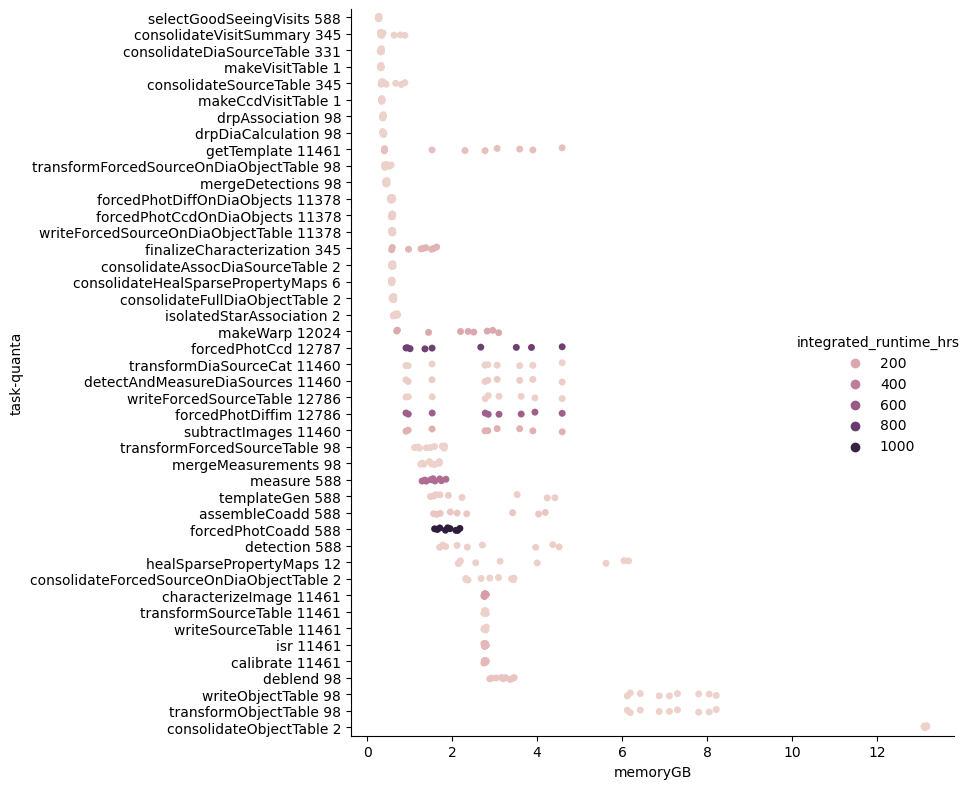

In [13]:
mergedqq =  pd.merge(qq, labelDF, left_on="task", right_on="task")
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
#mergedqq['integrated_runtime_log10_hrs'] = np.log10(mergedqq['integrated_runtime_log10_hrs'])
ax = sns.catplot(data=mergedqq[(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable")].sort_values('memoryGB'), 
            y="task-quanta", x="memoryGB", hue="integrated_runtime_hrs", height=8)

#ax.set_xticklabels(ax.ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.savefig('figures/w50_memory.png')
plt.show()

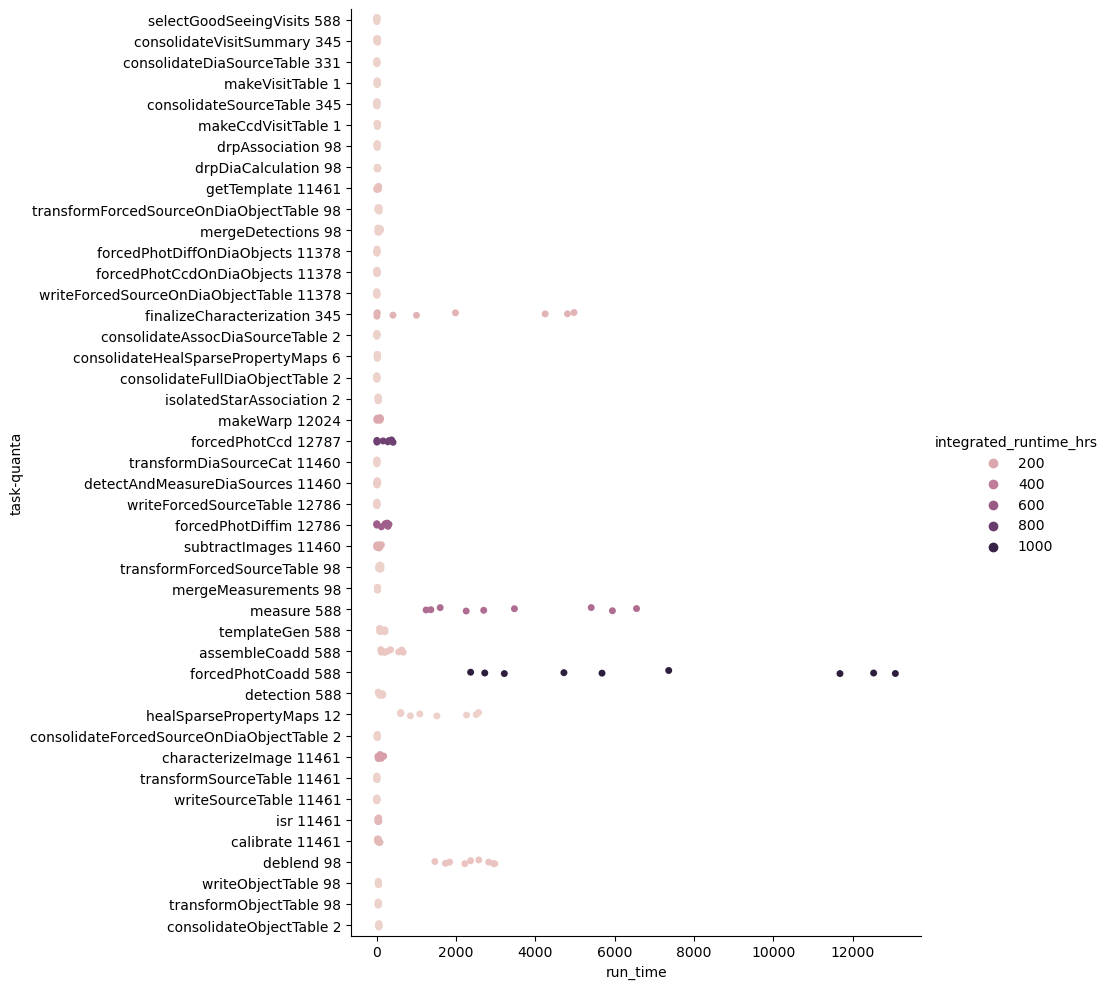

In [14]:
ax = sns.catplot(data=mergedqq[(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable")].sort_values('memoryGB'), 
            y="task-quanta", x="run_time", hue="integrated_runtime_hrs", height=10)
plt.savefig('figures/w50_runtime.png')
